### Rural ownership income

January 26, 2019

Brian Dew, @bd_econ

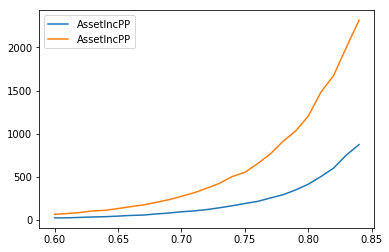

In [1]:
# Import packages
import pandas as pd
import numpy as np
import re, os, wquantiles

os.chdir('/home/brian/Documents/ASEC')

datafile = 'data/asec2018_pubuse.dat'
datadict = 'data/08ASEC2018_Data_Dict_Full.txt'

dd = open(datadict, 'r', encoding='iso-8859-1').read()

# Retrieve column info from dictionary
p = re.compile('D (\w+\-?\w+?)\s+(\d{1,2})\s+(\d+)\s+')
var_key = pd.DataFrame(p.findall(dd), columns=['Var', 'Len', 'Loc'])
var_key = var_key.apply(pd.to_numeric, errors='ignore')

# List of variables of interest to be extracted from full file
s = ['HRECORD', 'HDIVVAL', 'HINTVAL', 'HRNTVAL', 'HTOTVAL',
     'HSUP_WGT', 'H_NUMPER', 'HUNDER15', 'GTMETSTA']
s_key = var_key[var_key['Var'].isin(s)]

# Read raw fwf file
data = (pd.read_fwf(datafile, header=None, names=list(s_key.Var),
                 colspecs=list(zip(s_key.Loc-1, s_key.Loc + s_key.Len-1)))
          .query('HRECORD == 1 and HSUP_WGT > 0 and HUNDER15 > 0'))

data['AssetIncPP'] = ((data['HINTVAL'].astype('int') +
                       data['HDIVVAL'] +
                       data['HRNTVAL'].astype(int)) /
                      data['HUNDER15'])

pts = np.arange(0.6, 0.85, 0.01)
data_rural = data[data['GTMETSTA']==2]['AssetIncPP'].quantile(pts)
data_metro = data[data['GTMETSTA']==1]['AssetIncPP'].quantile(pts)

%matplotlib inline
pd.concat([data_rural, data_metro], axis=1).plot()
